# 一、資料集載入

In [2]:
#資料基本處理套件
import os
import numpy as np 
import pandas as pd 
import warnings

#資料視覺化分析套件
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib as mlp
mlp.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

#機器學習套件
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [3]:
#載入資料集
da = pd.read_csv('./input/PS_20174392719_1491204439457_log.csv')
da

KeyboardInterrupt: 

In [ ]:
#欄位名稱簡化

da = da.rename(columns=
             {'DALYs_mental disorder':'DALYs', 
              'Prevalence-with-mental-health-disorders':'disorder_prevalence',
              'people-with-mental-health-disorders':'disorders_people',
              'Unemployment Rate':'Unemployment_Rate', 
              'dem_culture_eiu':'democratization',
              'Sex ratio of birth':'Sex_birth', 
              'Population Density':'Population_Density'})

In [ ]:
#列出所有欄位的資料現狀
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               1747 non-null   object 
 1   Year                 1747 non-null   int64  
 2   DALYs                1747 non-null   float64
 3   disorder_prevalence  1747 non-null   float64
 4   disorders_people     1747 non-null   int64  
 5   GDP_per_capita       1747 non-null   int64  
 6   Unemployment_Rate    1747 non-null   float64
 7   democratization      1747 non-null   float64
 8   Sex_birth            1747 non-null   float64
 9   Population_Density   1747 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 136.6+ KB


In [ ]:
#載入資料集
dp = pd.read_csv(r'C:\Users\user\Desktop\Graduate_School\★MasterPaper\05_DataBase\disorder_national_dataset_2.csv')
dp

Entity  Year  \
0                      Afghanistan  2010   
1                      Afghanistan  2011   
2                      Afghanistan  2012   
3                      Afghanistan  2013   
4                      Afghanistan  2014   
5                      Afghanistan  2015   
6                      Afghanistan  2016   
7                      Afghanistan  2017   
8                      Afghanistan  2018   
9                      Afghanistan  2019   
10                         Albania  2010   
11                         Albania  2011   
12                         Albania  2012   
13                         Albania  2013   
14                         Albania  2014   
15                         Albania  2015   
16                         Albania  2016   
17                         Albania  2017   
18                         Albania  2018   
19                         Albania  2019   
20                         Algeria  2010   
21                         Algeria  2011   
22                         Algeria  2012   
23                         Algeria  2013   
24                         Algeria  2014   
25                         Algeria  2015   
26                         Algeria  2016   
27                         Algeria  2017   
28                         Algeria  2018   
29                         Algeria  2019   
30                          Angola  2010   
31                          Angola  2011   
32                          Angola  2012   
33                          Angola  2013   
34                          Angola  2014   
35                          Angola  2015   
36                          Angola  2016   
37                          Angola  2017   
38                          Angola  2018   
39                          Angola  2019   
40                       Argentina  2010   
41                       Argentina  2011   
42                       Argentina  2012   
43                       Argentina  2013   
44                       Argentina  2014   
45                       Argentina  2015   
46                       Argentina  2016   
47                       Argentina  2017   
48                       Argentina  2018   
49                       Argentina  2019   
50                         Armenia  2010   
51                         Armenia  2011   
52                         Armenia  2012   
53                         Armenia  2013   
54                         Armenia  2014   
55                         Armenia  2015   
56                         Armenia  2016   
57                         Armenia  2017   
58                         Armenia  2018   
59                         Armenia  2019   
60                       Australia  2010   
61                       Australia  2011   
62                       Australia  2012   
63                       Australia  2013   
64                       Australia  2014   
65                       Australia  2015   
66                       Australia  2016   
67                       Australia  2017   
68                       Australia  2018   
69                       Australia  2019   
70                         Austria  2010   
71                         Austria  2011   
72                         Austria  2012   
73                         Austria  2013   
74                         Austria  2014   
75                         Austria  2015   
76                         Austria  2016   
77                         Austria  2017   
78                         Austria  2018   
79                         Austria  2019   
80                      Azerbaijan  2010   
81                      Azerbaijan  2011   
82                      Azerbaijan  2012   
83                      Azerbaijan  2013   
84                      Azerbaijan  2014   
85                      Azerbaijan  2015   
86                      Azerbaijan  2016   
87                      Azerbaijan  2017   
88                      Azerbaijan  2018   
89                      Azerbaijan  2019   
90                      

In [ ]:
#欄位名稱簡化

dp = dp.rename(columns=
             {'DALYs_mental disorder':'DALYs', 
              'Prevalence-with-mental-health-disorders':'disorder_prevalence',
              'people-with-mental-health-disorders':'disorders_people',
              'Unemployment Rate':'Unemployment_Rate', 
              'dem_culture_eiu':'democratization',
              'Sex ratio of birth':'Sex_birth', 
              'Population Density':'Population_Density'})

In [ ]:
#列出所有欄位的資料現狀
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               1747 non-null   object 
 1   Year                 1747 non-null   int64  
 2   disorder_prevalence  1747 non-null   float64
 3   DALYs                1747 non-null   float64
 4   disorders_people     1747 non-null   int64  
 5   GDP_per_capita       1747 non-null   int64  
 6   Unemployment_Rate    1747 non-null   float64
 7   democratization      1747 non-null   float64
 8   Sex_birth            1747 non-null   float64
 9   Population_Density   1747 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 136.6+ KB


# 視覺化分析

In [ ]:
def get_headmap(da: dict):
    corr = da.corr()
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":10})
    plt.title("The relationship between country index and mental health")

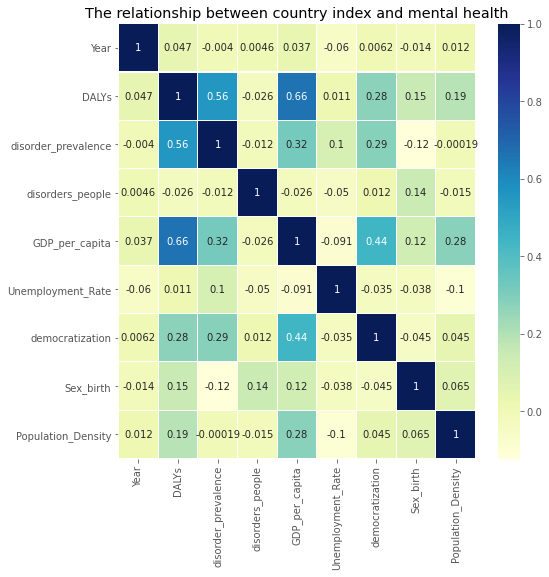

In [ ]:
get_headmap(da)

# 機器學習-SVM迴歸

In [ ]:
#拿掉用不到的欄位
da2 = da.drop(['Entity', 'Year'],axis=1)
da2

DALYs  disorder_prevalence  disorders_people  GDP_per_capita  \
0       3.1                 17.4           4479431            1957   
1       3.2                 17.3           4632218            1905   
2       3.3                 17.3           4786380            2075   
3       3.4                 17.2           4938827            2116   
4       3.4                 17.2           5051968            2102   
5       3.5                 17.1           5169607            2068   
6       3.5                 17.1           5332320            2057   
7       3.7                 17.1           5510364            2058   
8       3.8                 17.1           5689403            2034   
9       4.0                 17.1           5881346            2065   
10      5.9                 11.6            331726           10749   
11      5.8                 11.6            330397           11053   
12      5.8                 11.6            328819           11228   
13      5.7                 11.6            326273           11361   
14      5.6                 11.6            323627           11587   
15      5.6                 11.6            322285           11878   
16      5.5                 11.6            320916           12292   
17      5.4                 11.6            318721           12771   
18      5.4                 11.6            317090           13317   
19      5.4                 11.6            316139           13657   
20      7.3                 14.7           5121070           10971   
21      7.3                 14.7           5195953           11078   
22      7.4                 14.7           5275734           11234   
23      7.4                 14.7           5359273           11319   
24      7.4                 14.7           5443382           11513   
25      7.5                 14.7           5525580           11697   
26      7.6                 14.7           5603847           11826   
27      7.6                 14.7           5685172           11737   
28      7.7                 14.7           5781481           11631   
29      7.8                 14.8           5890019           11522   
30      2.4                 13.4           2345546            7692   
31      2.5                 13.4           2431920            7675   
32      2.7                 13.4           2522064            8037   
33      2.8                 13.4           2615649            8141   
34      3.0                 13.4           2715439            8240   
35      3.1                 13.4           2821016            8036   
36      3.3                 13.4           2931357            7569   
37      3.5                 13.4           3045515            7311   
38      3.6                 13.4           3160820            6934   
39      3.8                 13.3           3276493            6670   
40      6.2                 13.5           5282979           23521   
41      6.2                 13.5           5347450           24648   
42      6.2                 13.5           5411743           24119   
43      6.3                 13.6           5478889           24424   
44      6.3                 13.6           5545528           23550   
45      6.3                 13.6           5612817           23934   
46      6.3                 13.6           5680399           23190   
47      6.3                 13.6           5744791           23597   
48      6.3                 13.6           5807115           22747   
49      6.3                 13.6           5865630           22066   
50      4.8                 11.4            351914            9286   
51      4.8                 11.4            349644            9725   
52      4.9                 11.4            347813           10398   
53      5.0                 11.4            346538           10691   
54      5.0                 11.4            345448           11020   
55      5.0                 11.4            344435           11321   
56      5.0     

In [ ]:
x = da2.iloc[:, 1:8]
y = da2.iloc[:, 0] #DALYs
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))
#y_train = std_y.fit_transform(y_train)
#y_test = std_y.transform(y_test)

clf = SVR(kernel='rbf', C=1, gamma='auto')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
y_predict = std_y.inverse_transform(y_predict.reshape(-1, 1))
y_real = std_y.inverse_transform(y_test)

for i in range(10):
  print('預測值：{}，真實值：{}'.format(y_predict[i], y_real[i][0]))
merror = mean_squared_error(y_real, y_predict)
print('MSE：{}'.format(merror))

RMSE=np.sqrt(merror)
print("RMSE:", RMSE)

預測值：[13.20581343]，真實值：13.7
預測值：[3.29360803]，真實值：3.0
預測值：[6.21425901]，真實值：4.9
預測值：[9.5413278]，真實值：10.0
預測值：[9.74361943]，真實值：10.0
預測值：[4.31927896]，真實值：4.5
預測值：[7.70510534]，真實值：8.7
預測值：[5.47276963]，真實值：3.5
預測值：[4.95965255]，真實值：4.8
預測值：[8.33684781]，真實值：9.2
MSE：0.8051841817260442
RMSE: 0.8973205568391065


In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_real, y_predict)
print(r2_score)

0.8655614078172044


In [ ]:
#拿掉用不到的欄位
dp2 = dp.drop(['Entity', 'Year'],axis=1)
dp2

disorder_prevalence  DALYs  disorders_people  GDP_per_capita  \
0                    17.4    3.1           4479431            1957   
1                    17.3    3.2           4632218            1905   
2                    17.3    3.3           4786380            2075   
3                    17.2    3.4           4938827            2116   
4                    17.2    3.4           5051968            2102   
5                    17.1    3.5           5169607            2068   
6                    17.1    3.5           5332320            2057   
7                    17.1    3.7           5510364            2058   
8                    17.1    3.8           5689403            2034   
9                    17.1    4.0           5881346            2065   
10                   11.6    5.9            331726           10749   
11                   11.6    5.8            330397           11053   
12                   11.6    5.8            328819           11228   
13                   11.6    5.7            326273           11361   
14                   11.6    5.6            323627           11587   
15                   11.6    5.6            322285           11878   
16                   11.6    5.5            320916           12292   
17                   11.6    5.4            318721           12771   
18                   11.6    5.4            317090           13317   
19                   11.6    5.4            316139           13657   
20                   14.7    7.3           5121070           10971   
21                   14.7    7.3           5195953           11078   
22                   14.7    7.4           5275734           11234   
23                   14.7    7.4           5359273           11319   
24                   14.7    7.4           5443382           11513   
25                   14.7    7.5           5525580           11697   
26                   14.7    7.6           5603847           11826   
27                   14.7    7.6           5685172           11737   
28                   14.7    7.7           5781481           11631   
29                   14.8    7.8           5890019           11522   
30                   13.4    2.4           2345546            7692   
31                   13.4    2.5           2431920            7675   
32                   13.4    2.7           2522064            8037   
33                   13.4    2.8           2615649            8141   
34                   13.4    3.0           2715439            8240   
35                   13.4    3.1           2821016            8036   
36                   13.4    3.3           2931357            7569   
37                   13.4    3.5           3045515            7311   
38                   13.4    3.6           3160820            6934   
39                   13.3    3.8           3276493            6670   
40                   13.5    6.2           5282979           23521   
41                   13.5    6.2           5347450           24648   
42                   13.5    6.2           5411743           24119   
43                   13.6    6.3           5478889           24424   
44                   13.6    6.3           5545528           23550   
45                   13.6    6.3           5612817           23934   
46                   13.6    6.3           5680399           23190   
47                   13.6    6.3           5744791           23597   
48                   13.6    6.3           5807115           22747   
49                   13.6    6.3           5865630           22066   
50                   11.4    4.8            351914            9286   
51                   11.4    4.8            349644            9725   
52                   11.4    4.9            347813           10398   
53                   11.4    5.0            346538           10691   
54                   11.4    5.0            345448           11020   
55                   11.4    5.0            344435           11321   
56              

In [ ]:
x = dp2.iloc[:, 1:8]
y = dp2.iloc[:, 0] #disorder_prevalence
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))
#y_train = std_y.fit_transform(y_train)
#y_test = std_y.transform(y_test)

clf = SVR(kernel='rbf', C=1, gamma='auto')
clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
y_predict = std_y.inverse_transform(y_predict.reshape(-1, 1))
y_real = std_y.inverse_transform(y_test)

for i in range(10):
  print('預測值：{}，真實值：{}'.format(y_predict[i], y_real[i][0]))
merror = mean_squared_error(y_real, y_predict)
print('MSE：{}'.format(merror))

RMSE=np.sqrt(merror)
print("RMSE:", RMSE)

預測值：[11.84159444]，真實值：11.0
預測值：[15.78379277]，真實值：15.7
預測值：[12.11695743]，真實值：11.1
預測值：[12.53311552]，真實值：13.0
預測值：[13.31327281]，真實值：11.7
預測值：[12.74561994]，真實值：12.9
預測值：[10.12957891]，真實值：10.4
預測值：[15.14586803]，真實值：15.0
預測值：[11.78108568]，真實值：11.6
預測值：[11.60153909]，真實值：10.5
MSE：1.4430877450425228
RMSE: 1.2012858714904304


In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_real, y_predict)
print(r2_score)

0.705080195328818


# 機器學習-梯度下降法線性迴歸

In [ ]:
x = da2.iloc[:, 1:8]
y = da2.iloc[:, 0] #DALYs
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))
#y_train = std_y.fit_transform(y_train)
#y_test = std_y.transform(y_test)

sgd = SGDRegressor()
sgd.fit(x_train, y_train)
print('權重值：{}'.format(sgd.coef_)) 
print('偏置值：{}'.format(sgd.intercept_))
y_predict = std_y.inverse_transform(sgd.predict(x_test)).reshape(-1, 1)
y_real = std_y.inverse_transform(y_test).reshape(-1, 1)

for i in range(5):
  print('預測值：{}，真實值：{}'.format(y_predict[i], y_real[i]))
merror = mean_squared_error(y_real, y_predict)
print('MSE：{}'.format(merror))

RMSE=np.sqrt(merror)
print("RMSE:", RMSE)

權重值：[ 0.42821945 -0.03064448  0.51688896  0.0247298  -0.05325816  0.14283956
  0.04409935]
偏置值：[0.01030868]
預測值：[3.45653392]，真實值：[4.1]
預測值：[5.426341]，真實值：[6.1]
預測值：[4.20539869]，真實值：[3.2]
預測值：[5.0732996]，真實值：[7.6]
預測值：[4.01202696]，真實值：[2.6]
MSE：2.5324478903410403
RMSE: 1.5913666737559387


In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_real, y_predict)
print(r2_score)

0.5979947447445624


In [ ]:
x = dp2.iloc[:, 1:8]
y = dp2.iloc[:, 0] #disorder_prevalence
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))
#y_train = std_y.fit_transform(y_train)
#y_test = std_y.transform(y_test)

sgd = SGDRegressor()
sgd.fit(x_train, y_train)

print('權重值：{}'.format(sgd.coef_)) 
print('偏置值：{}'.format(sgd.intercept_))
y_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
y_real = std_y.inverse_transform(y_test)
for i in range(10):
  print('預測值：{}，真實值：{}'.format(y_predict[i], y_real[i]))
merror = mean_squared_error(y_real, y_predict)
print('MSE：{}'.format(merror))

RMSE=np.sqrt(merror)
print("RMSE:", RMSE)

權重值：[ 0.5989864   0.02961011 -0.09507147  0.08622267  0.14743634 -0.18927143
 -0.08427262]
偏置值：[-0.00399106]
預測值：[13.76789146]，真實值：[13.1]
預測值：[13.21052552]，真實值：[11.9]
預測值：[14.07664709]，真實值：[12.2]
預測值：[14.16069117]，真實值：[13.6]
預測值：[12.79554543]，真實值：[13.3]
預測值：[12.51806772]，真實值：[11.7]
預測值：[11.87687135]，真實值：[10.3]
預測值：[15.78441747]，真實值：[13.6]
預測值：[13.47711608]，真實值：[12.3]
預測值：[15.12208513]，真實值：[15.6]
MSE：2.941226512180623
RMSE: 1.7150004408689297


In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_real, y_predict)
print(r2_score)

0.4225478671634605


# 機器學習-XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

#XGBoost模型訓練

x = da2.iloc[:, 1:8]
y = da2.iloc[:, 0] #DALYs
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state = 45)

model = xgb.XGBRegressor(n_estimators=1000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xgboost_model = model.fit(x_train, y_train)
xgboost_model.score(x_test, y_test)

0.9673970524891893

Test dataset: 
    r2: 0.97 Squared error: 0.43


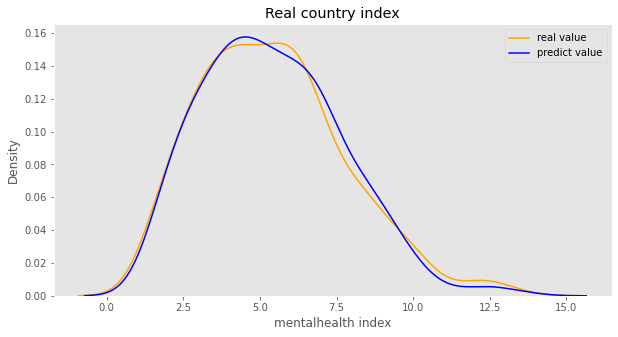

In [ ]:
#XGBoost模型評估

from sklearn.metrics import r2_score

def get_plot_predict(y, y_pred):
    plt.figure(figsize=(10, 5))

    ax1 = sns.distplot(y, hist=False, color="orange", 
                       label="real value")
    ax2 = sns.distplot(y_pred, hist=False, color="blue", 
                       label="predict value", ax=ax1)
    plt.title("Real country index")
    plt.xlabel("mentalhealth index")
    plt.gca().legend()
    plt.grid()
    plt.show()

train_predict = xgboost_model.predict(x_train)
test_predict = xgboost_model.predict(x_test)

r2_train = r2_score(y_train, train_predict)
squared_error_train = np.sqrt(mean_squared_error(y_train, train_predict))
                              
r2_test = r2_score(y_test, test_predict)
squared_error_test = np.sqrt(mean_squared_error(y_test, test_predict))
                            
#print("Train dataset: ")
#print(f"    r2: {round(r2_train, 2)} Squared error: {round(squared_error_train, 2)}")
#get_plot_predict(y_train, train_predict)
print("Test dataset: ")
print(f"    r2: {round(r2_test, 2)} Squared error: {round(squared_error_test, 2)}")
get_plot_predict(y_test, test_predict)

In [ ]:
x2 = df2.iloc[:, 1:8]
y2 = df2.iloc[:, 0] #disorder_prevalence
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state = 45)

model = xgb.XGBRegressor(n_estimators=1000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xgboost_model = model.fit(x2_train, y2_train)
xgboost_model.score(x2_test, y2_test)

0.9726439201710927

Test dataset: 
    r2: 0.97 Squared error: 0.39


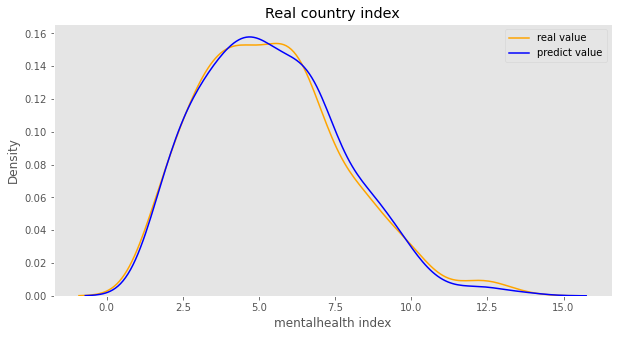

In [ ]:
#XGBoost模型評估

from sklearn.metrics import r2_score

def get_plot_predict(y2, y2_pred):
    plt.figure(figsize=(10, 5))

    ax1 = sns.distplot(y2, hist=False, color="orange", 
                       label="real value")
    ax2 = sns.distplot(y2_pred, hist=False, color="blue", 
                       label="predict value", ax=ax1)
    plt.title("Real country index")
    plt.xlabel("mentalhealth index")
    plt.gca().legend()
    plt.grid()
    plt.show()

train_predict = xgboost_model.predict(x2_train)
test_predict = xgboost_model.predict(x2_test)

r2_train = r2_score(y2_train, train_predict)
squared_error_train = np.sqrt(mean_squared_error(y2_train, train_predict))
                              
r2_test = r2_score(y2_test, test_predict)
squared_error_test = np.sqrt(mean_squared_error(y2_test, test_predict))
                            
#print("Train dataset: ")
#print(f"    r2: {round(r2_train, 2)} Squared error: {round(squared_error_train, 2)}")
#get_plot_predict(y_train, train_predict)
print("Test dataset: ")
print(f"    r2: {round(r2_test, 2)} Squared error: {round(squared_error_test, 2)}")
get_plot_predict(y2_test, test_predict)

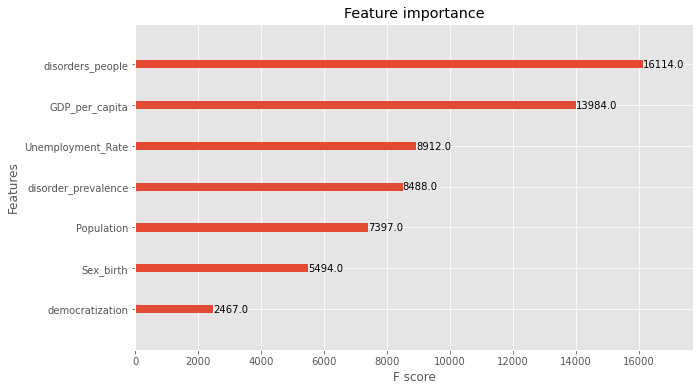

In [ ]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10, 6)
plot_importance(model,max_num_features=100)
plt.show()

# 機器學習-KNN_Regression

# 深度學習-MLP

In [ ]:
#MLP-DALYs

seed=5811
np.random.seed(seed)
dataset = da2.values
np.random.shuffle(dataset)

In [ ]:
print("#2-4-2 分割資料集")
#分割成特徵資料和標籤資料
X = dataset[:, 1:8] 
Y = dataset[:, 0] 

#2-4-2 分割資料集


In [ ]:
da2.astype(float)

DALYs  disorder_prevalence  disorders_people  GDP_per_capita  \
0       3.1                 17.4         4479431.0          1957.0   
1       3.2                 17.3         4632218.0          1905.0   
2       3.3                 17.3         4786380.0          2075.0   
3       3.4                 17.2         4938827.0          2116.0   
4       3.4                 17.2         5051968.0          2102.0   
5       3.5                 17.1         5169607.0          2068.0   
6       3.5                 17.1         5332320.0          2057.0   
7       3.7                 17.1         5510364.0          2058.0   
8       3.8                 17.1         5689403.0          2034.0   
9       4.0                 17.1         5881346.0          2065.0   
10      5.9                 11.6          331726.0         10749.0   
11      5.8                 11.6          330397.0         11053.0   
12      5.8                 11.6          328819.0         11228.0   
13      5.7                 11.6          326273.0         11361.0   
14      5.6                 11.6          323627.0         11587.0   
15      5.6                 11.6          322285.0         11878.0   
16      5.5                 11.6          320916.0         12292.0   
17      5.4                 11.6          318721.0         12771.0   
18      5.4                 11.6          317090.0         13317.0   
19      5.4                 11.6          316139.0         13657.0   
20      7.3                 14.7         5121070.0         10971.0   
21      7.3                 14.7         5195953.0         11078.0   
22      7.4                 14.7         5275734.0         11234.0   
23      7.4                 14.7         5359273.0         11319.0   
24      7.4                 14.7         5443382.0         11513.0   
25      7.5                 14.7         5525580.0         11697.0   
26      7.6                 14.7         5603847.0         11826.0   
27      7.6                 14.7         5685172.0         11737.0   
28      7.7                 14.7         5781481.0         11631.0   
29      7.8                 14.8         5890019.0         11522.0   
30      2.4                 13.4         2345546.0          7692.0   
31      2.5                 13.4         2431920.0          7675.0   
32      2.7                 13.4         2522064.0          8037.0   
33      2.8                 13.4         2615649.0          8141.0   
34      3.0                 13.4         2715439.0          8240.0   
35      3.1                 13.4         2821016.0          8036.0   
36      3.3                 13.4         2931357.0          7569.0   
37      3.5                 13.4         3045515.0          7311.0   
38      3.6                 13.4         3160820.0          6934.0   
39      3.8                 13.3         3276493.0          6670.0   
40      6.2                 13.5         5282979.0         23521.0   
41      6.2                 13.5         5347450.0         24648.0   
42      6.2                 13.5         5411743.0         24119.0   
43      6.3                 13.6         5478889.0         24424.0   
44      6.3                 13.6         5545528.0         23550.0   
45      6.3                 13.6         5612817.0         23934.0   
46      6.3                 13.6         5680399.0         23190.0   
47      6.3                 13.6         5744791.0         23597.0   
48      6.3                 13.6         5807115.0         22747.0   
49      6.3                 13.6         5865630.0         22066.0   
50      4.8                 11.4          351914.0          9286.0   
51      4.8                 11.4          349644.0          9725.0   
52      4.9                 11.4          347813.0         10398.0   
53      5.0                 11.4          346538.0         10691.0   
54      5.0                 11.4          345448.0         11020.0   
55      5.0                 11.4          344435.0         11321.0   
56      5.0     

In [ ]:
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)

#分割訓練和測試資料集
#訓練資料前1396筆(0.8)
X_train, Y_train = X[:1396], Y[:1396]     
#測試資料後350筆(0.2)
X_test, Y_test = X[1396:], Y[1396:]  

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((1396, 7), (351, 7), (1396,), (351,))

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam",  metrics=["mae"])
    return model

In [ ]:
def build_deep_model():
    model = Sequential()
    model.add(Dense(32,input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam",   metrics=["mae"])
    return model

In [ ]:
k = 8
nb_val_samples = len(X_train) // k
nb_epochs = 80
mse_scores = []
mae_scores = []
print(nb_val_samples)

174


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

for i in range(k):
    print("Processing Fold #" + str(i))
    X_val = X_train[i*nb_val_samples: (i+1)*nb_val_samples]
    Y_val = Y_train[i*nb_val_samples: (i+1)*nb_val_samples]
    X_train_p = np.concatenate(
            [X_train[:i*nb_val_samples],
            X_train[(i+1)*nb_val_samples:]], axis=0)
    Y_train_p = np.concatenate(
            [Y_train[:i*nb_val_samples],
            Y_train[(i+1)*nb_val_samples:]], axis=0)
    model = build_model() #or model = build_deep_model() 
    model.fit(X_train_p, Y_train_p,  
              epochs=nb_epochs, batch_size=16,  
              verbose=0)
    mse, mae = model.evaluate(X_val, Y_val)
    mse_scores.append(mse)
    mae_scores.append(mae)

Processing Fold #0
6/6 [==============================] - 0s 2ms/step - loss: 1.0015 - mae: 0.7497
Processing Fold #1
6/6 [==============================] - 0s 2ms/step - loss: 1.0053 - mae: 0.7655
Processing Fold #2
6/6 [==============================] - 0s 2ms/step - loss: 1.0727 - mae: 0.7740
Processing Fold #3
6/6 [==============================] - 0s 2ms/step - loss: 0.9726 - mae: 0.7875
Processing Fold #4
6/6 [==============================] - 0s 2ms/step - loss: 1.0337 - mae: 0.7596
Processing Fold #5
6/6 [==============================] - 0s 1ms/step - loss: 0.7617 - mae: 0.6824
Processing Fold #6
6/6 [==============================] - 0s 1ms/step - loss: 1.1399 - mae: 0.8314
Processing Fold #7
6/6 [==============================] - 0s 2ms/step - loss: 0.8911 - mae: 0.7459


In [ ]:
print("MSE_val: ", np.mean(mse_scores))
print("MAE_val: ", np.mean(mae_scores))
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)

MSE_val:  0.9848104789853096
MAE_val:  0.7619983032345772
11/11 [==============================] - 0s 2ms/step - loss: 0.9231 - mae: 0.7335
MSE_test:  0.92313551902771
MAE_test:  0.7335016131401062


In [ ]:
print("#3-5 儲存模型")
#方法一：分開儲存模型結構與權重
json_str = model.to_json()
with open("example2_model.config", "w") as text_file:
     text_file.write(json_str)
model.save_weights("example2_model.weight")

#3-5 儲存模型


In [ ]:
model.save("example_2.h5")

In [ ]:
#模型呼叫  方法一： 
from tensorflow.keras.models import model_from_json
model = Sequential()
with open("example2_model.config", "r") as text_file:
    json_str = text_file.read()
model = model_from_json(json_str)
model.load_weights("example2_model.weight", by_name=False)

In [ ]:
#模型呼叫  方法二： 
#from keras.models import load_model
from tensorflow.keras.models import load_model
model = Sequential()
model = load_model("example_2.h5")

11/11 [==============================] - 0s 834us/step


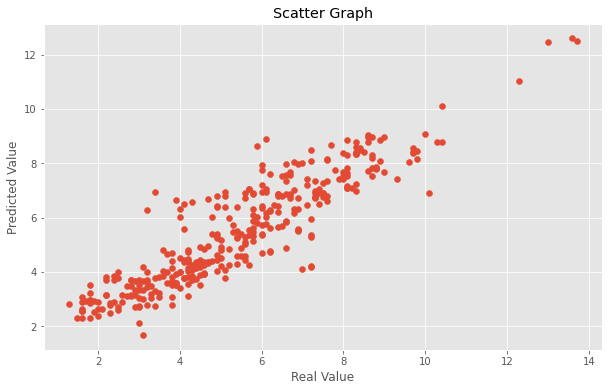

In [ ]:
import matplotlib.pyplot as plt   #載入繪圖功能
model.compile(loss="mse", optimizer="adam",  
                  metrics=["mae"])    #編譯模型
Y_pred=model.predict(X_test) #預測
plt.title("Scatter Graph")          
plt.scatter(Y_test, Y_pred)
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.show()

In [ ]:
for i in range(len(Y_test)):
    print(Y_test[i], Y_pred[i][0])

6.6 5.884264
5.4 4.577208
4.3 3.844266
3.2 3.4276457
7.1 6.468923
3.4 6.9428215
5.7 5.3503523
7.6 8.14706
4.8 5.401376
6.0 6.9305162
4.9 4.6408143
4.6 4.8457017
3.2 2.7856762
7.0 4.0919447
1.8 2.2877634
8.7 7.8345375
8.3 7.24428
6.6 7.3470387
8.7 8.1989
4.2 3.109525
13.0 12.44734
3.9 6.658538
8.3 8.347486
6.8 6.3042097
4.2 4.39752
6.0 5.3656054
3.0 3.7092118
5.5 4.897487
4.2 4.3609076
7.6 6.5972157
8.0 7.532567
6.0 7.7556067
2.4 3.8437953
2.2 3.8033066
6.2 6.2384205
4.2 4.738396
6.9 5.537598
3.8 2.7865062
8.7 7.517108
4.7 4.936696
2.8 3.4696796
3.0 3.049934
6.9 6.711505
4.0 4.0068502
6.4 6.801484
8.1 7.6565237
4.8 6.008894
2.5 2.6034243
3.1 4.1990128
8.3 8.7722
3.3 3.0526617
2.3 2.4818673
6.6 4.8627872
2.2 3.166131
3.1 3.0157251
5.5 4.598242
4.9 5.3873405
7.4 7.0399504
3.3 3.4701087
4.9 4.0245986
7.2 5.938119
7.3 6.735118
7.1 7.4141817
7.6 8.133855
8.6 8.774715
1.6 2.6536083
6.6 7.584259
7.5 6.9092913
5.7 4.273431
5.8 5.8680506
6.0 4.6964855
4.1 4.4371634
8.0 7.695921
4.9 5.258154
8.9 

In [ ]:
MSE=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("MSE:", MSE)

MSE: 0.9607994913586745


In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(Y_test, Y_pred)
print(r2_score)

0.8201964951782145


In [ ]:
#MLP-disorder_prevalence

seed=5811
np.random.seed(seed)
dataset = dp2.values
np.random.shuffle(dataset)
print("#2-4-2 分割資料集")
#分割成特徵資料和標籤資料
X = dataset[:, 1:8] 
Y = dataset[:, 0] 

#2-4-2 分割資料集


In [ ]:
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)

#分割訓練和測試資料集
#訓練資料前1396筆(0.8)
X_train, Y_train = X[:1396], Y[:1396]     
#測試資料後350筆(0.2)
X_test, Y_test = X[1396:], Y[1396:]  

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((1396, 7), (351, 7), (1396,), (351,))

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam",  metrics=["mae"])
    return model

def build_deep_model():
    model = Sequential()
    model.add(Dense(32,input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam",   metrics=["mae"])
    return model

In [ ]:
k = 8
nb_val_samples = len(X_train) // k
nb_epochs = 80
mse_scores = []
mae_scores = []
print(nb_val_samples)

174


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

for i in range(k):
    print("Processing Fold #" + str(i))
    X_val = X_train[i*nb_val_samples: (i+1)*nb_val_samples]
    Y_val = Y_train[i*nb_val_samples: (i+1)*nb_val_samples]
    X_train_p = np.concatenate(
            [X_train[:i*nb_val_samples],
            X_train[(i+1)*nb_val_samples:]], axis=0)
    Y_train_p = np.concatenate(
            [Y_train[:i*nb_val_samples],
            Y_train[(i+1)*nb_val_samples:]], axis=0)
    model = build_model() #or model = build_deep_model() 
    model.fit(X_train_p, Y_train_p,  
              epochs=nb_epochs, batch_size=16,  
              verbose=0)
    mse, mae = model.evaluate(X_val, Y_val)
    mse_scores.append(mse)
    mae_scores.append(mae)

Processing Fold #0
6/6 [==============================] - 0s 1ms/step - loss: 1.7841 - mae: 0.9021
Processing Fold #1
6/6 [==============================] - 0s 1ms/step - loss: 2.1130 - mae: 0.9448
Processing Fold #2
6/6 [==============================] - 0s 2ms/step - loss: 2.2275 - mae: 0.9495
Processing Fold #3
6/6 [==============================] - 0s 2ms/step - loss: 2.2719 - mae: 0.8899
Processing Fold #4
6/6 [==============================] - 0s 1ms/step - loss: 3.1241 - mae: 1.0076
Processing Fold #5
6/6 [==============================] - 0s 1ms/step - loss: 1.9475 - mae: 0.8956
Processing Fold #6
6/6 [==============================] - 0s 2ms/step - loss: 1.6646 - mae: 0.9313
Processing Fold #7
6/6 [==============================] - 0s 2ms/step - loss: 1.3331 - mae: 0.9136


In [ ]:
print("MSE_val: ", np.mean(mse_scores))
print("MAE_val: ", np.mean(mae_scores))
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)

MSE_val:  2.0582292079925537
MAE_val:  0.9292910993099213
11/11 [==============================] - 0s 2ms/step - loss: 1.9973 - mae: 0.9467
MSE_test:  1.997336745262146
MAE_test:  0.9466907382011414


In [ ]:
print("#3-5 儲存模型")
#方法一：分開儲存模型結構與權重
json_str = model.to_json()
with open("example2_model.config", "w") as text_file:
     text_file.write(json_str)
model.save_weights("example2_model.weight")

#3-5 儲存模型


In [ ]:
model.save("example_2.h6")

INFO:tensorflow:Assets written to: example_2.h6\assets


In [ ]:
#模型呼叫  方法一： 
from tensorflow.keras.models import model_from_json
model = Sequential()
with open("example2_model.config", "r") as text_file:
    json_str = text_file.read()
model = model_from_json(json_str)
model.load_weights("example2_model.weight", by_name=False)

In [ ]:
#模型呼叫  方法二： 
#from keras.models import load_model
from tensorflow.keras.models import load_model
model = Sequential()
model = load_model("example_2.h6")

11/11 [==============================] - 0s 1ms/step


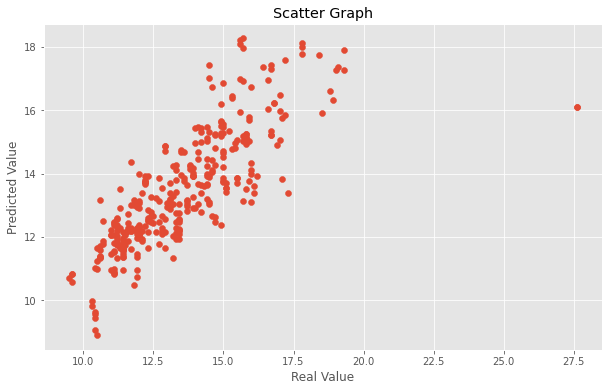

In [ ]:
import matplotlib.pyplot as plt   #載入繪圖功能
model.compile(loss="mse", optimizer="adam",  
                  metrics=["mae"])    #編譯模型
Y_pred=model.predict(X_test) #預測
plt.title("Scatter Graph")          
plt.scatter(Y_test, Y_pred)
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.show()

In [ ]:
for i in range(len(Y_test)):
    print(Y_test[i], Y_pred[i][0])

14.6 14.063252
12.0 13.062321
12.4 12.481936
14.7 12.639087
15.8 15.158702
13.2 11.348655
10.5 11.248394
15.9 15.68583
12.8 12.673157
15.0 14.521285
11.2 12.600594
11.4 11.888209
12.3 12.547777
13.2 14.250533
11.1 12.372647
15.4 14.798351
14.6 16.749287
16.9 14.913018
17.2 17.579483
12.3 12.83676
13.5 14.687305
13.2 12.024156
16.8 16.23404
12.2 13.727582
11.4 11.5932455
13.6 13.874551
13.4 12.208189
11.6 12.288917
11.1 12.46766
15.8 15.133983
15.3 16.380573
15.5 13.867522
12.3 12.158839
14.4 15.025804
14.4 13.980433
11.4 11.460441
12.2 13.748058
10.6 13.160674
15.6 16.977596
11.7 11.6154585
12.9 11.663779
12.5 12.6487055
16.6 16.034035
13.0 12.933225
13.9 13.92563
14.4 15.12573
13.4 11.949584
11.2 12.186968
15.1 13.547956
13.7 13.136064
12.4 12.664332
13.9 13.255487
12.2 13.671124
10.7 12.49768
12.1 11.886146
12.0 13.125695
11.2 12.39155
16.7 15.232938
14.7 12.480239
11.3 12.903827
14.6 14.415253
17.0 16.48022
14.9 15.188873
15.9 15.782699
18.9 16.324055
10.6 11.35819
15.0 14.639834
16

In [ ]:
MSE=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("MSE:", MSE)

MSE: 1.4132716938430658


In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(Y_test, Y_pred)
print(r2_score)

0.622664772477497


# 深度學習-DNN